In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harrieshra","key":"afeace9b3729e22738c3a7566f687df5"}'}

In [11]:
!pip install kaggle

In [12]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download vitaminc/cigarette-smoker-detection

 99% 2.48G/2.50G [00:37<00:00, 90.6MB/s]
100% 2.50G/2.50G [00:37<00:00, 72.3MB/s]


In [14]:
!unzip /content/cigarette-smoker-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/data/smoking/000335.jpg  
  inflating: data/data/smoking/000337.jpg  
  inflating: data/data/smoking/000338.jpg  
  inflating: data/data/smoking/000339.jpg  
  inflating: data/data/smoking/000343.jpg  
  inflating: data/data/smoking/000344.jpg  
  inflating: data/data/smoking/000352.jpg  
  inflating: data/data/smoking/000353.jpg  
  inflating: data/data/smoking/000354.png  
  inflating: data/data/smoking/000356.jpg  
  inflating: data/data/smoking/000357.jpg  
  inflating: data/data/smoking/000359.jpg  
  inflating: data/data/smoking/000362.jpg  
  inflating: data/data/smoking/000363.jpg  
  inflating: data/data/smoking/000365.jpg  
  inflating: data/data/smoking/000365.png  
  inflating: data/data/smoking/000366.jpg  
  inflating: data/data/smoking/000367.jpg  
  inflating: data/data/smoking/000369.jpg  
  inflating: data/data/smoking/000371.jpg  
  inflating: data/data/smoking/000372.jpg  
  inflating: data/data/sm

In [15]:
!rm -rf /content/cigarette-smoker-detection.zip
!rm -rf /content/data/data /content/data/READ.ME

In [16]:
!rm -rf /content/data/not_smoking/*.gif
!rm -rf /content/data/smoking/*.gif

In [17]:
import os
import shutil

def keep_only_n_images(folder_path, n=500):
    # Iterate through subfolders in the given folder
    for root, dirs, files in os.walk(folder_path):
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        if len(image_files) > n:
            # Sort images by modification time
            image_files.sort(key=lambda x: os.path.getmtime(os.path.join(root, x)))
            # Remove extra images beyond n
            files_to_remove = image_files[n:]
            for file_name in files_to_remove:
                file_path = os.path.join(root, file_name)
                os.remove(file_path)
                print(f"Removed: {file_path}")

# Specify the path to your main folder containing subfolders with images
main_folder_path = '/content/data'

keep_only_n_images(main_folder_path, n=500)

Removed: /content/data/not_smoking/gg0537.jpg
Removed: /content/data/not_smoking/gg0528.jpg
Removed: /content/data/not_smoking/gg0536.jpg
Removed: /content/data/not_smoking/gg0533.jpg
Removed: /content/data/not_smoking/gg0543.jpg
Removed: /content/data/not_smoking/gg0555.jpg
Removed: /content/data/not_smoking/gg0550.jpg
Removed: /content/data/not_smoking/gg0552.jpg
Removed: /content/data/not_smoking/gg0541.jpg
Removed: /content/data/not_smoking/gg0551.jpg
Removed: /content/data/not_smoking/gg0548.png
Removed: /content/data/not_smoking/gg0549.jpg
Removed: /content/data/not_smoking/gg0542.jpg
Removed: /content/data/not_smoking/gg0554.jpg
Removed: /content/data/not_smoking/gg0553.jpg
Removed: /content/data/not_smoking/gg0544.jpg
Removed: /content/data/not_smoking/gg0546.jpg
Removed: /content/data/not_smoking/gg0547.jpg
Removed: /content/data/not_smoking/gg0556.jpg
Removed: /content/data/not_smoking/gg0540.jpg
Removed: /content/data/not_smoking/gg0545.jpg
Removed: /content/data/not_smoking

In [18]:
import os
import random
import shutil

# Define the path to your images folder
images_folder = "/content/data"

# Define the classes
classes = os.listdir(images_folder)

os.makedirs('/content/data',exist_ok=True)
# Create train and validation folders
train_folder = os.path.join('/content/data', 'train')
val_folder = os.path.join('/content/data', 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Define the split ratio
split_ratio = 0.8

# Iterate through each class
for class_name in classes:
    class_folder = os.path.join(images_folder, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)  # Shuffle the images

    # Calculate the split index
    split_index = int(len(images) * split_ratio)

    # Split the images
    train_images = images[:split_index]
    val_images = images[split_index:]

    # Copy training images to train folder
    for image in train_images:
        src = os.path.join(class_folder, image)
        dst = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.join(train_folder, class_name), exist_ok=True)
        shutil.copy(src, dst)

    # Copy validation images to validation folder
    for image in val_images:
        src = os.path.join(class_folder, image)
        dst = os.path.join(val_folder, class_name, image)
        os.makedirs(os.path.join(val_folder, class_name), exist_ok=True)
        shutil.copy(src, dst)

print("Data split and folders created successfully.")

Data split and folders created successfully.


In [19]:
!rm -rf /content/data/not_smoking /content/data/smoking

In [20]:
import os
from PIL import Image

def rename_images(directory):
    class_folders = os.listdir(directory)

    for class_folder in class_folders:
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpeg', 'jpg'))]

            for i, image_file in enumerate(image_files, 1):
                try:
                    with Image.open(os.path.join(class_path, image_file)) as img:
                        new_name = str(i) + '.jpg'
                        new_path = os.path.join(class_path, new_name)
                        os.rename(os.path.join(class_path, image_file), new_path)
                except (OSError, IOError):
                    print(f"Removing corrupted file: {os.path.join(class_path, image_file)}")
                    os.remove(os.path.join(class_path, image_file))

# Replace 'path_to_data_folder' with the actual path to your data folder
data_folder = '/content/data'

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

rename_images(train_folder)
rename_images(test_folder)

In [21]:
import os
train_path = '/content/data/train'
test_path = '/content/data/test'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = not_smoking
No of Images = 400
Class Name = smoking
No of Images = 400

Total No of Training Images = 800


Test Files Details :

Class Name = not_smoking
No of Images = 100
Class Name = smoking
No of Images = 100

Total No of Testing Images = 200


No of classes = 2


# 1. Import needed libraries

In [22]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# 2. Preprocessing

## 2.1 Load data

In [23]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [24]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [25]:
tr_df = train_df('/content/data/train')
tr_df.head()

,Class Path,Class
0,/content/data/train/not_smoking/107.jpg,not_smoking
1,/content/data/train/not_smoking/247.jpg,not_smoking
2,/content/data/train/not_smoking/379.jpg,not_smoking
3,/content/data/train/not_smoking/30.jpg,not_smoking
4,/content/data/train/not_smoking/60.jpg,not_smoking


In [26]:
tr_df.shape

(800, 2)

In [27]:
ts_df = test_df('/content/data/test')
ts_df.head()

,Class Path,Class
0,/content/data/test/not_smoking/30.jpg,not_smoking
1,/content/data/test/not_smoking/60.jpg,not_smoking
2,/content/data/test/not_smoking/44.jpg,not_smoking
3,/content/data/test/not_smoking/12.jpg,not_smoking
4,/content/data/test/not_smoking/26.jpg,not_smoking


In [28]:
ts_df.shape

(200, 2)

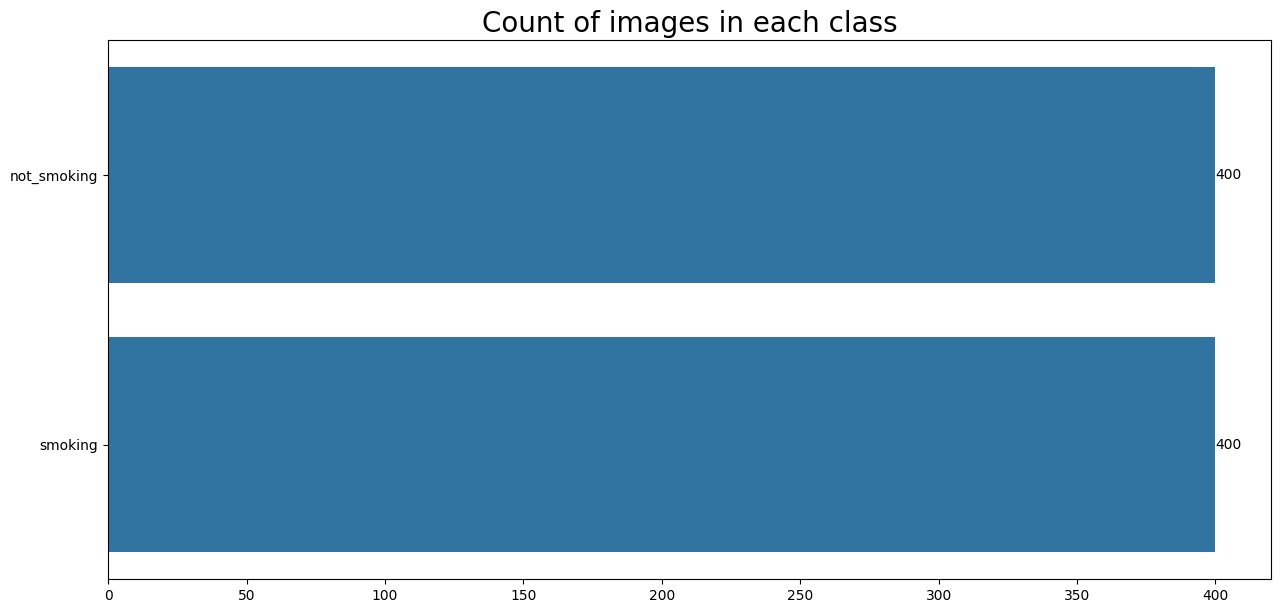

In [29]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

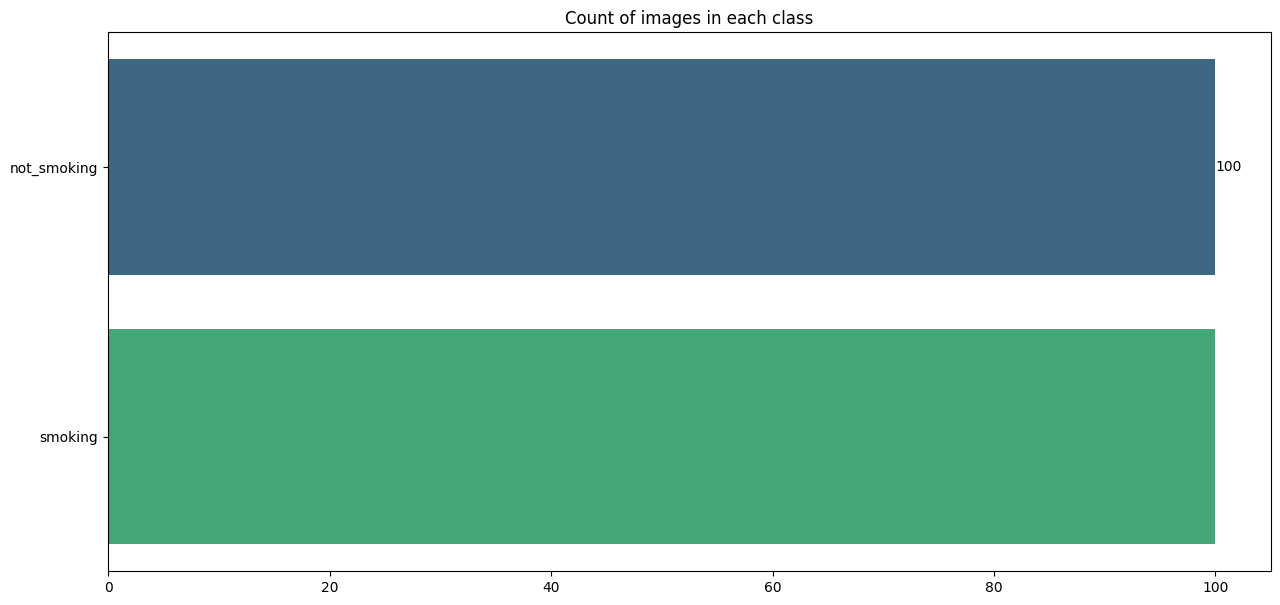

In [30]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

## 2.3 Data preprocessing

In [31]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255)

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 799 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


## 2.4 Getting samples from data

In [32]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 3. Building Deep Learning Model

In [33]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(len(os.listdir('/content/data/train')), activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                         

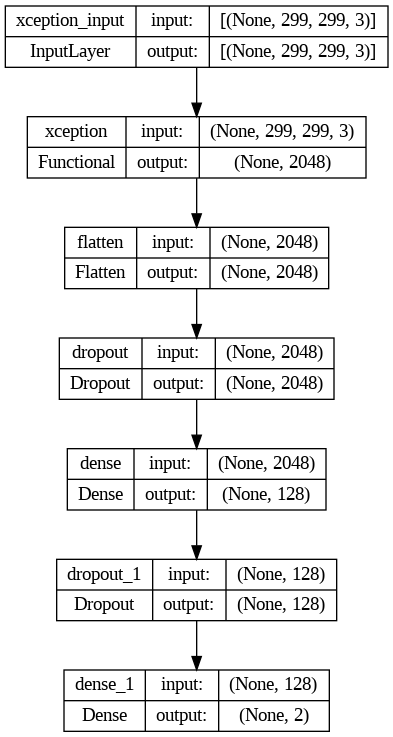

In [34]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 4. Training

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath for saving the model weights
checkpoint_filepath = 'xception_checkpoint.keras'

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',      # Monitor validation loss
    save_best_only=True,     # Save the best model (based on validation loss)
    verbose=1                # Verbosity level (1: display messages)
)

# Train the model with the ModelCheckpoint callback
hist = model.fit(
    tr_gen,
    epochs=25,
    validation_data=ts_gen,
    shuffle=False,
    callbacks=[checkpoint_callback]  # Pass the callback to the training process
)

Epoch 1/25
25/25 [==============================] - ETA: 0s - loss: 0.9463 - accuracy: 0.6558 - precision: 0.6558 - recall: 0.6558
Epoch 1: val_loss improved from inf to 0.56503, saving model to xception_checkpoint.keras
25/25 [==============================] - 43s 1s/step - loss: 0.9463 - accuracy: 0.6558 - precision: 0.6558 - recall: 0.6558 - val_loss: 0.5650 - val_accuracy: 0.7650 - val_precision: 0.7650 - val_recall: 0.7650
Epoch 2/25
25/25 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.7760 - precision: 0.7760 - recall: 0.7760
Epoch 2: val_loss improved from 0.56503 to 0.52857, saving model to xception_checkpoint.keras
25/25 [==============================] - 24s 974ms/step - loss: 0.4916 - accuracy: 0.7760 - precision: 0.7760 - recall: 0.7760 - val_loss: 0.5286 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 3/25
25/25 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.7997 - precision: 0.7997 - recall: 0.799

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

## 4.1 Visualize model performance

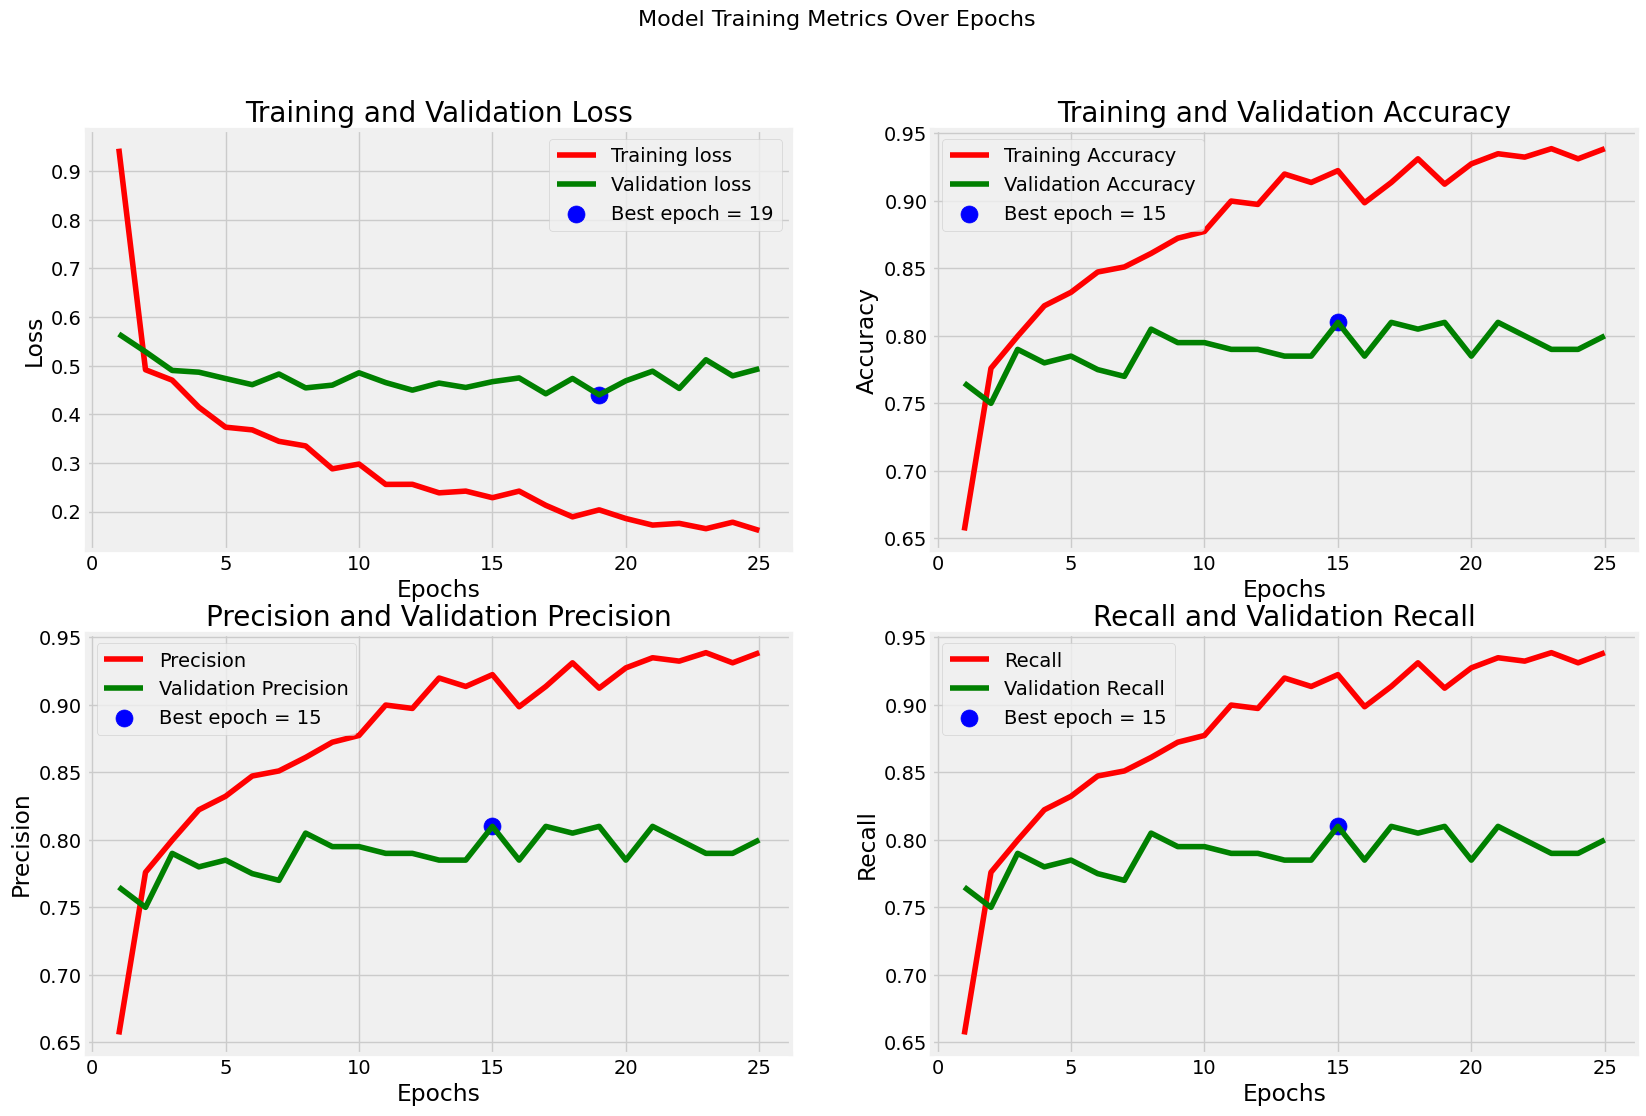

In [37]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

# 5. Testing and Evaluation

## 5.1 Evaluate

In [38]:
train_score = model.evaluate(tr_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

13/13 [==============================] - 6s 447ms/step - loss: 0.4937 - accuracy: 0.8000 - precision: 0.8000 - recall: 0.8000
Train Loss: 0.1074
Train Accuracy: 97.25%
--------------------
Test Loss: 0.4937
Test Accuracy: 80.00%


In [39]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

13/13 [==============================] - 5s 317ms/step


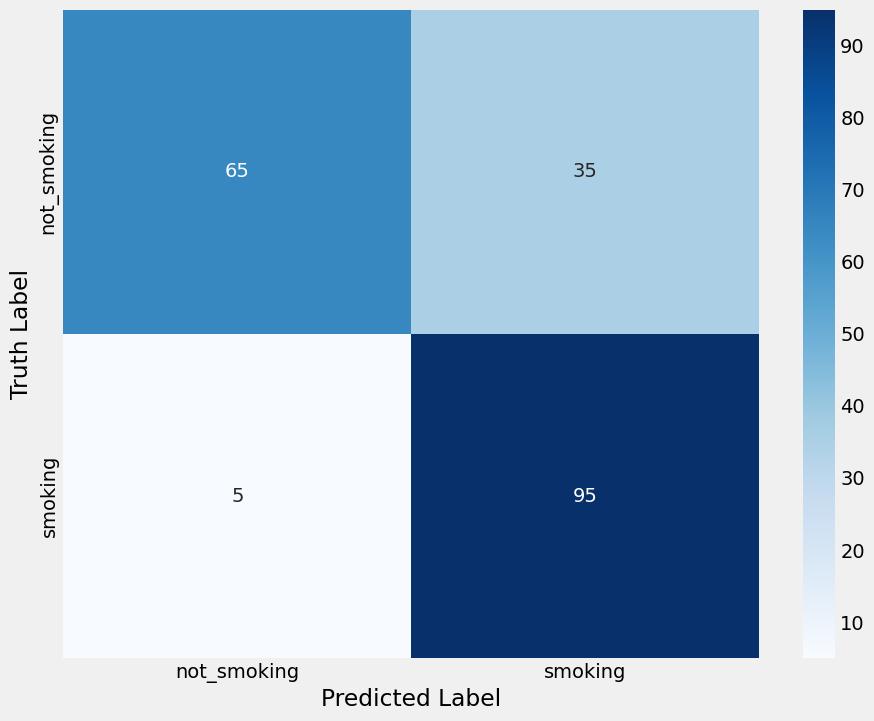

In [40]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [41]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.93      0.65      0.76       100
           1       0.73      0.95      0.83       100

    accuracy                           0.80       200
   macro avg       0.83      0.80      0.80       200
weighted avg       0.83      0.80      0.80       200



## 5.2 Testing

In [42]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [43]:
class_dict

{'not_smoking': 0, 'smoking': 1}

1/1 [==============================] - 1s 1s/step


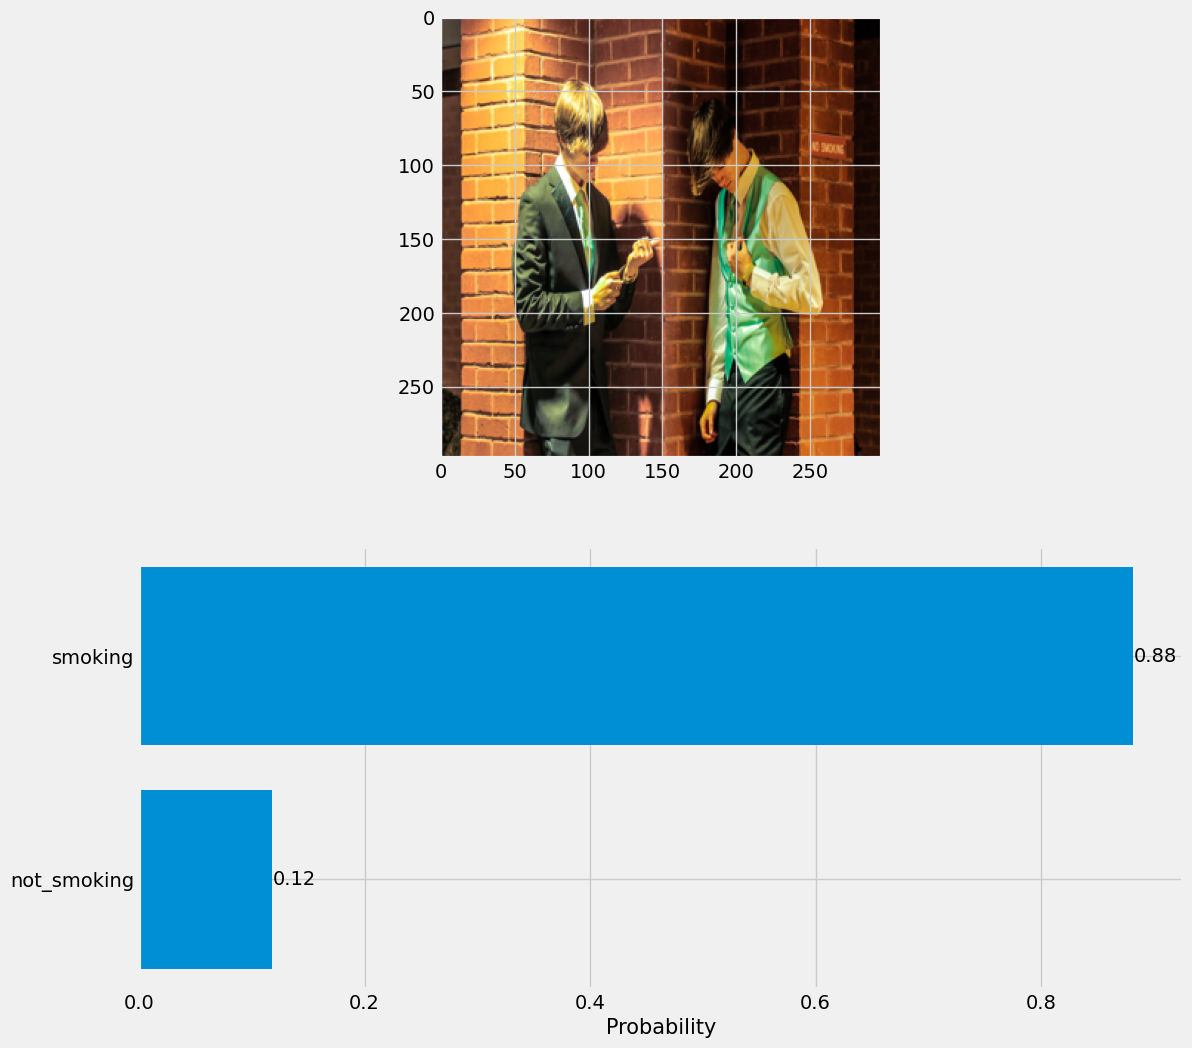

In [44]:
predict('/content/data/train/not_smoking/1.jpg')

1/1 [==============================] - 0s 27ms/step


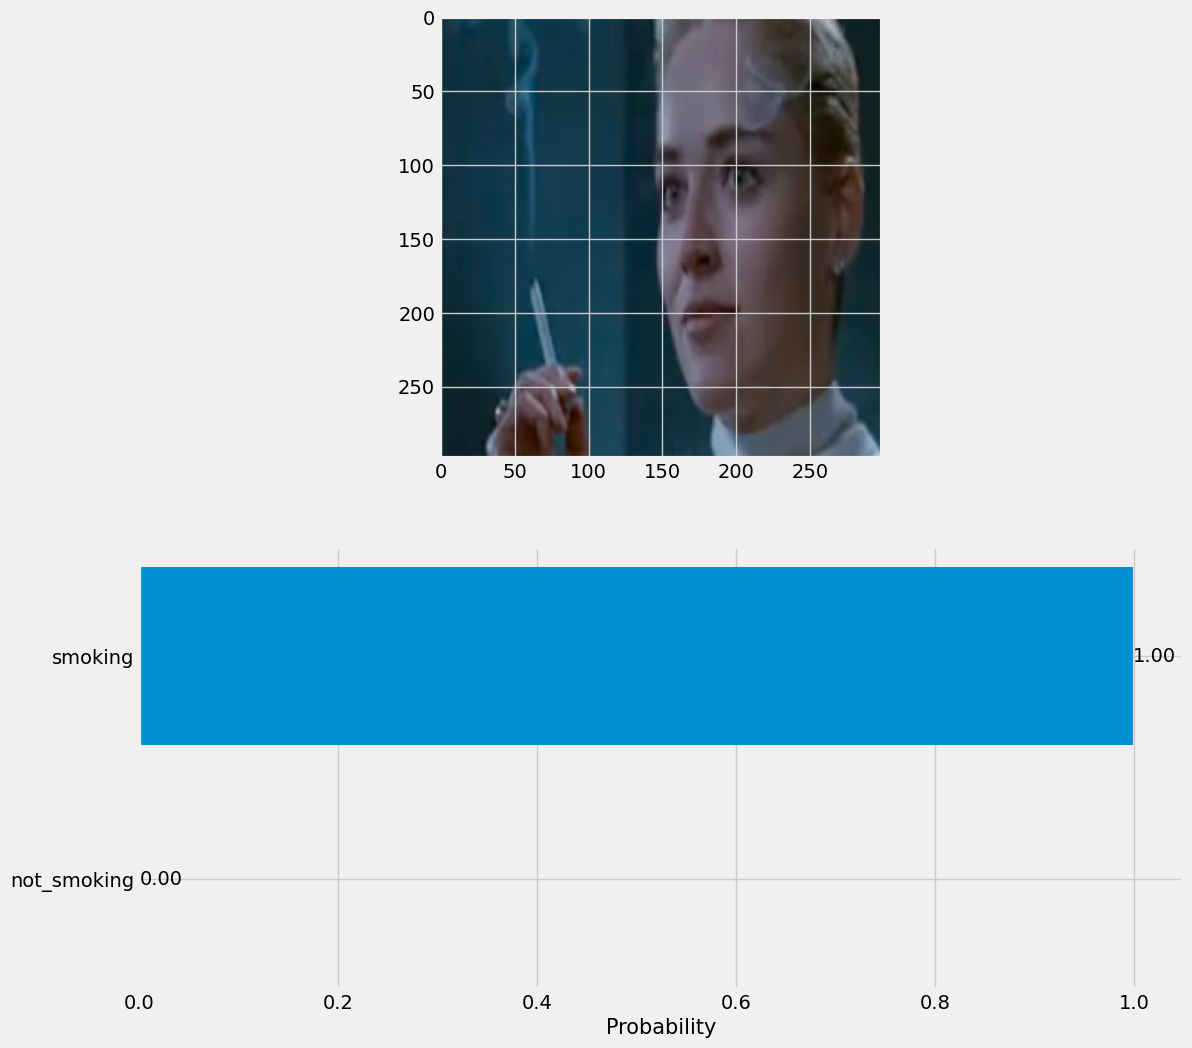

In [45]:
predict('/content/data/train/smoking/1.jpg')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
!mv "/content/xception_checkpoint.keras" /content/drive/MyDrive/insta-reel/sample_vid_data/.